<h2> Python for data analysis - Final project </h2>
<h3> Marion GATINOIS and Katell GOURLET</h3> 
<h3> ESILV A.4 2020-2021 DIA.1</h3> 

Dataset used below : 
https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Relevant Information:
Abstract: This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).


Citation Request:
Please include this citation if you plan to use this database: 
 
K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision
Support System for Predicting the Popularity of Online News. Proceedings
of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence,
September, Coimbra, Portugal.

<h3> Imports : </h3>

In [14]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
#For modelisation : 
from sklearn.model_selection import train_test_split

#For regression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

#For classification
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

<h3> Importing the data : OnlineNewsPopularity.csv </h3>

In [16]:
dfPop=pd.read_csv('OnlineNewsPopularity.csv')

In [17]:
#Let's see a litle bit what we got here :
dfPop.head(5)

#newdf = dfPop[dfPop.columns[13:18]]
#newdf

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
dfPop.tail(5)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.100000,0.75,-0.260000,-0.5,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.136364,0.70,-0.211111,-0.4,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.136364,0.50,-0.356439,-0.8,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.062500,0.50,-0.205246,-0.5,-0.012500,0.000000,0.000000,0.500000,0.000000,1100
39643,http://mashable.com/2014/12/27/youtube-channel...,8.0,10.0,157.0,0.701987,1.0,0.846154,1.0,1.0,0.0,...,0.100000,0.50,-0.200000,-0.2,-0.200000,0.333333,0.250000,0.166667,0.250000,1300


Number of Instances: 39797 
Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)

In [19]:
# Let's verify it :
print('The number of rows and colums are : '+str(dfPop.shape))
# We have 39 644 that is 142 instances less than tell in the .txt file

The number of rows and colums are : (39644, 61)


As the two first attribute are :
0. url:                           URL of the article
1. timedelta:                     Days between the article publication and the dataset acquisition

We can remove them as we won't use them for our prediction.
More over, the last columns share is our target colums. 
We will seperate the target and the features

In [20]:
# We download our datasat
dfPop = dfPop.drop(columns=['url', ' timedelta'])

In [21]:
# We split our dataset in wo dataFrame: features in X and target variable in Y
Y = dfPop[' shares']
X = dfPop.drop(columns=[' shares'])

In [22]:
# Let's verify
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [23]:
# Let's verify
Y

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name:  shares, Length: 39644, dtype: int64

In [24]:
# Let's see the 10 most popular articles :
y_sort = Y.sort_values(ascending=True)
# We can see that we only hae 8 articles with more than 300 000 share : not relevent/exception data ?
y_sort.tail(10)

35256    284700
16113    298400
4506     306100
18788    310800
16009    441000
3145     617900
16268    652900
23237    663600
5370     690400
9365     843300
Name:  shares, dtype: int64

In [25]:
# Let's know a litle bit more about our target :
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html
print('The number max of share : ' + str(max(Y)))
print('The number min of share : ' + str(min(Y)))
print('The sum of all share : ' + str(sum(Y)))

print('The mean of all share : ' + str( sum(Y)/Y.size))
#The mean is less relevent as there is a few article with a lot of share than influence it
print('The median of all share : ' + str( Y.median() ))
#The median is more relevante here
print('The quantiles of all share : ' + str(Y.quantile([.25, .5, .75, 0.87, 0.9, .95])) )

#écart-type
print('The std of all share : ' + str(Y.std()))

The number max of share : 843300
The number min of share : 1
The sum of all share : 134606452
The mean of all share : 3395.3801836343455
The median of all share : 1400.0
The quantiles of all share : 0.25      946.0
0.50     1400.0
0.75     2800.0
0.87     5000.0
0.90     6200.0
0.95    10800.0
Name:  shares, dtype: float64
The std of all share : 11626.950748651716


In [26]:
# Some test:
#Y.quantile(.75)+1.5*(Y.quantile(.75)-Y.quantile(.25)) 
#5581.0 > 87% : 5000.0 < 90%
#min( max(Y), float(Y.quantile(.75)+1.5*(Y.quantile(.75)-Y.quantile(.25))) )
#5581.0
#max( min(Y), float(Y.quantile(.25)-1.5*(Y.quantile(.75)-Y.quantile(.25))) )
#1 = min(Y) : on garde 1
#Y.quantile(.25)-1.5*(Y.quantile(.75)-Y.quantile(.25)) = -1835.0

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

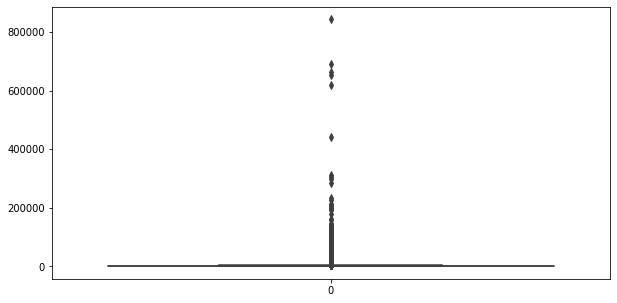

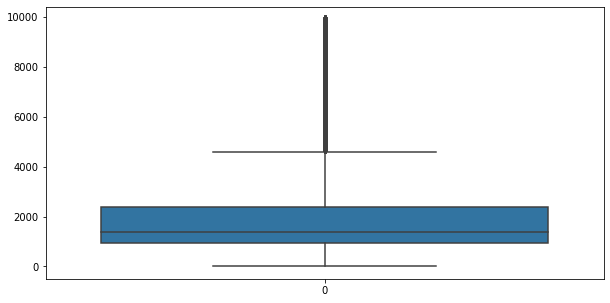

In [27]:
# We can observe it :
plt.figure(figsize=(10,5))
sns.boxplot(data=Y)
plt.plot

# For better display, we take around 95% of the data (remove too popular article) : 
plt.figure(figsize=(10,5))
sns.boxplot(data=Y.where(Y<10000))
plt.plot

In [28]:
Y_limit = Y.quantile(.75)+1.5*(Y.quantile(.75)-Y.quantile(.25)) 
Y_limit  #5581.0

5581.0

<h3> DATA VISUALISATION </h3>

In [29]:
dfPop[' shares'].index

RangeIndex(start=0, stop=39644, step=1)

In [30]:
#Some test
#dfPop_clean = dfPop[dfPop[' shares'] < Y_limit]
#Y_clean = dfPop_clean[' shares']
#X_clean = dfPop_clean.drop(columns=[' shares'])
#y_sort = Y_clean.sort_values(ascending=True) 
#y_sort.tail(10)

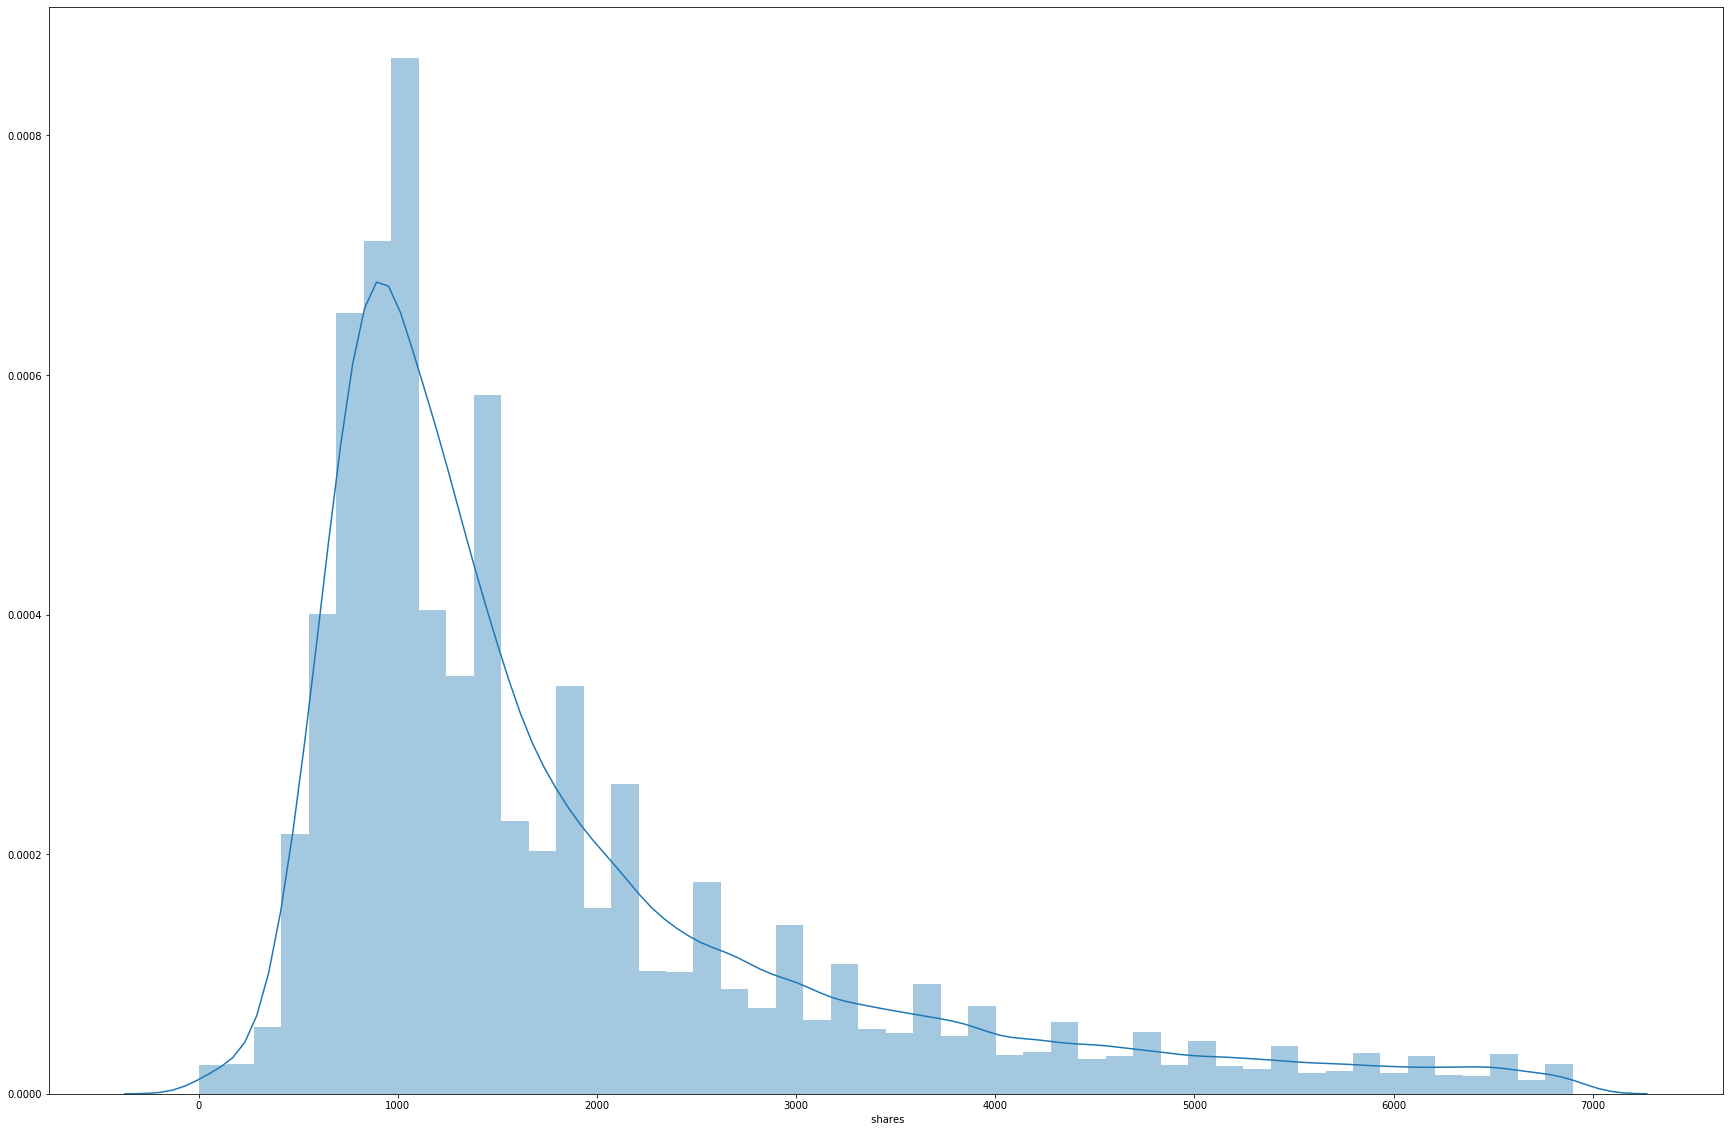

In [31]:
# As the quantil of 0.90 is at 6200.0, we will take all the share of Y < 7000 for a better display 

plt.figure(figsize=(30,20))
sns.distplot(Y.where(Y < 7000))
plt.show()

In [32]:
#We caneasily observe the dispertion of the share aroun the median we calculade above.

Lest observe the data visualisation depeding on

31. weekday_is_monday:             Was the article published on a Monday?
32. weekday_is_tuesday:            Was the article published on a Tuesday?
33. weekday_is_wednesday:          Was the article published on a Wednesday?
34. weekday_is_thursday:           Was the article published on a Thursday?
35. weekday_is_friday:             Was the article published on a Friday?
36. weekday_is_saturday:           Was the article published on a Saturday?
37. weekday_is_sunday:             Was the article published on a Sunday?
38. is_weekend:                    Was the article published on the weekend?

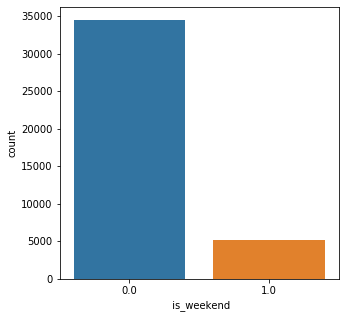

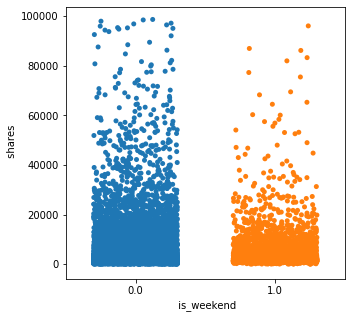

In [33]:

plt.figure(figsize=(5,5))

sns.countplot(data=X, x=' is_weekend')
#plt.plot()

plt.figure(figsize=(5,5))

sns.stripplot(data=dfPop.where(dfPop < 100000),x=' is_weekend',y=' shares',jitter=0.3)
# The repartition look the same, it seems to not heve a real impact on the shres rate
#plt.plot()


plt.show()

Lest observe the data visualisation depeding on everything :

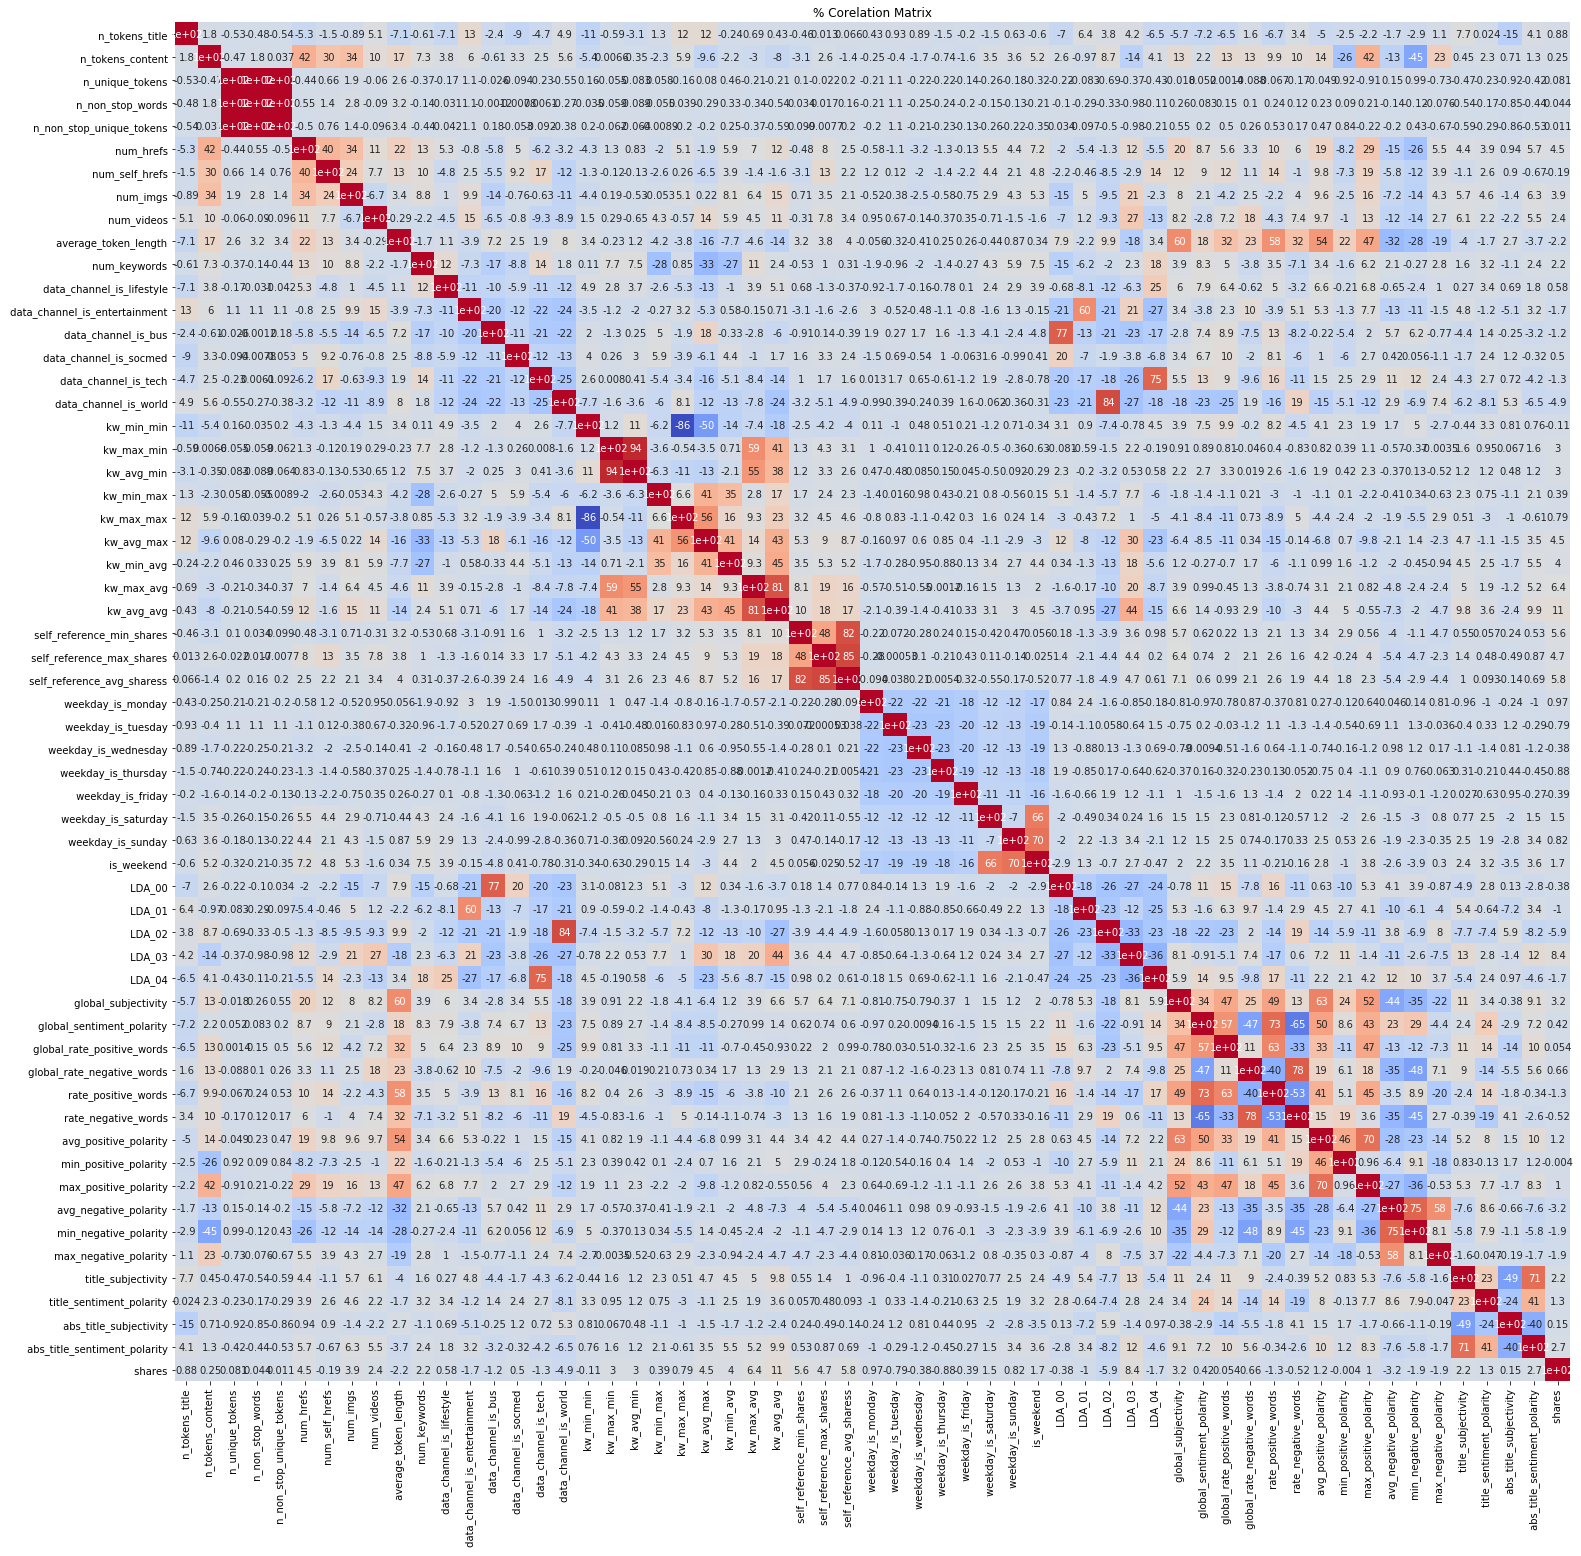

In [34]:
plt.figure(figsize=(25,25))
sns.heatmap(cbar=False,annot=True,data=dfPop.corr()*100,cmap='coolwarm')
plt.title('% Corelation Matrix')
plt.show()

<h4> Some vizualisation... : </h4>

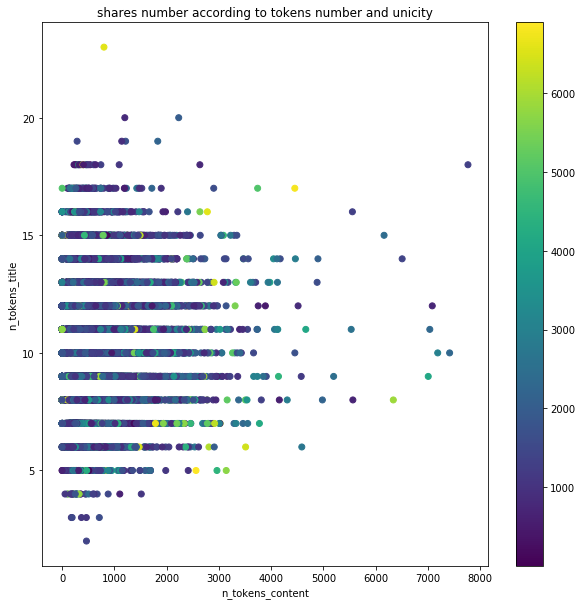

In [35]:

plt.figure(figsize=(10,10))
plt.scatter(X[' n_tokens_content'], X[' n_tokens_title'],c=Y.where(Y < 7000),cmap='viridis')
plt.colorbar()
plt.xlabel('n_tokens_content')
plt.ylabel('n_tokens_title')
plt.title('shares number according to tokens number and unicity')
plt.show()



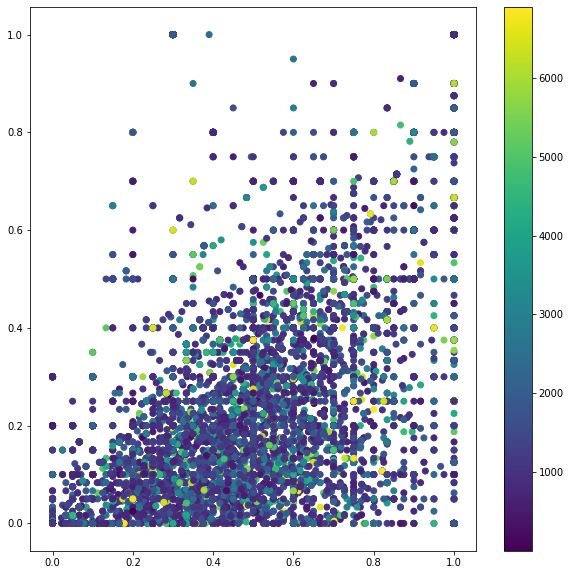

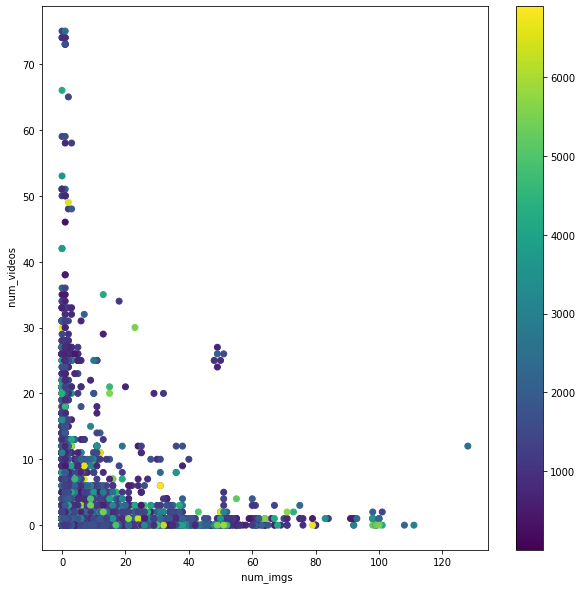

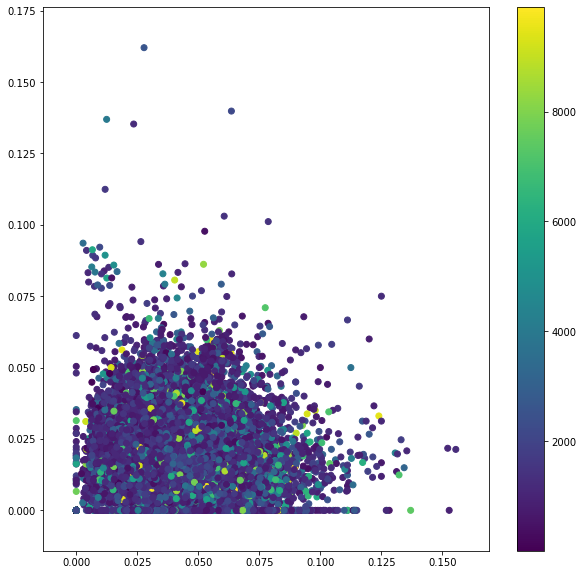

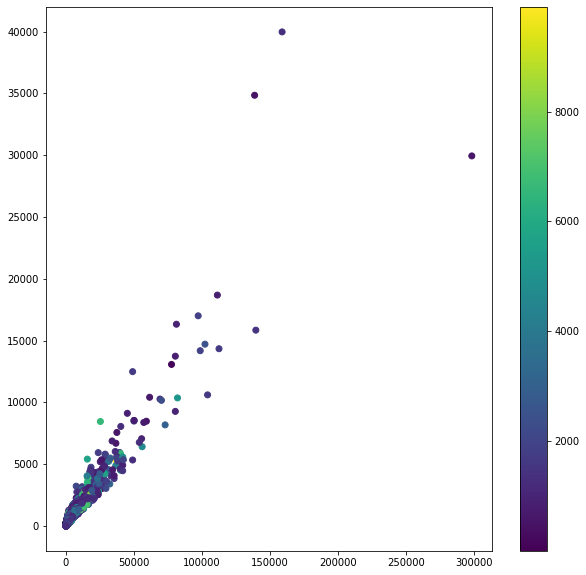

In [36]:
# Some vizualisation but without a lot of conclusion
plt.figure(figsize=(10,10))
plt.scatter(X[' title_subjectivity'], X[' abs_title_sentiment_polarity'],c=Y.where(Y < 7000),cmap='viridis')
plt.colorbar()
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(X[' num_imgs'], X[' num_videos'],c=Y.where(Y < 7000),cmap='viridis')
plt.colorbar()
plt.xlabel(' num_imgs')
plt.ylabel(' num_videos')
plt.show()

plt.figure(figsize=(10,10))
plt.scatter(X[' global_rate_positive_words'], X[' global_rate_negative_words'],c=Y.where(Y < 10000),cmap='viridis')
plt.colorbar()
plt.show()
        
plt.figure(figsize=(10,10))
plt.scatter(X[' kw_max_min'], X[' kw_avg_min'],c=Y.where(Y < 10000),cmap='viridis')
plt.colorbar()
plt.show()

<h2> DATA MODELISATION </h2> 

<h3> => Random Forest Regression </h3>

In [38]:
# Split dataset into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3) 
# 70% training and 30% test

In [46]:
##look shape of data #seems correct
print('Training Features Shape :', X_train.shape)
print('Testing Features Shape :', X_test.shape)
print('Training Labels Shape :', Y_train.shape)
print('Testing Labels Shape:', Y_test.shape)

Training Features Shape : (27750, 58)
Testing Features Shape : (11894, 58)
Training Labels Shape : (27750,)
Testing Labels Shape: (11894,)


In [47]:
RF_Reg = RandomForestRegressor(n_estimators = 100, random_state = 10)

In [48]:
# Train the model on training data
RF_Reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [49]:
predictions = RF_Reg.predict(X_test)

In [50]:
#Not relevente :
errors = abs(predictions - Y_test)
mape = 100 * np.mean(errors / Y_test)
accuracy = 100 - mape
print('Model Performance')
print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
Average Error: 3425.4580 degrees.
Accuracy = -102.10%.


In [51]:
#R^2 : 
# positive
print(RF_Reg.score(X_train,Y_train))
# négative, close to 0
print(RF_Reg.score(X_test,Y_test))

0.8502794421206381
-0.05939243043538478


In [52]:
len(Y_test.to_numpy()) #1894
len(predictions) #11894

predictions[5] #3797.94
Y_test.to_numpy()[5] #2400
# Close but not enought close
#Y_test[5423]#1500


2900

In [53]:
#As there is a lot a mistake, we converte idata to True or False to see teh accuracy:

In [54]:
# Labels are the values we want to predict
median=1400
mean=3400
Y_Class= []
for i in range (0,len(predictions)):
    if Y_test.to_numpy()[i]>mean :
        Y_Class.append(True)
    else:
        Y_Class.append(False)
        
Y_Predict= []
for i in range (0,len(predictions)):
    if predictions[i]>mean :
        Y_Predict.append(True)
    else:
        Y_Predict.append(False)

In [55]:
Y_Predict

[False,
 True,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 Fals

In [56]:
Y_Class

[True,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,


In [57]:
print("Accuracy:",metrics.accuracy_score(Y_Predict, Y_Class)) 
#Not very good : Accuracy: 0.5446443585000841
#Not very good, but with the mean, a little bit better : Accuracy: 0.6457037161594081

Accuracy: 0.6362872036320834


<h3> => Random Forest Classification </h3>

The mean of all share : 3395.3801836343455 / 1671
The median of all share : 1400.0 / 1300
The median of all share : 0.25      946.0
0.50     1400.0
0.75     2800.0
0.90     6200.0
0.95    10800.0
Y_clean = dfPop_clean[' shares']
X_clean = dfPop_clean.drop(columns=[' shares'])


1. With the mean as the decision threshold

In [58]:
from sklearn.metrics import confusion_matrix
import pylab as pl

In [59]:
#We transformed the task into a binary task using a decision threshold of 1400, the median :

#Mean of our data
mean = 3395

In [60]:
#CREATE CLASSIFICATION VALUE TO PREDICT
#We consoder that a data is popular when it is superior that the mean of all data
Y_Class = []
#True : popular
#False : unpopular
for i in range (0,len(Y)):
    if Y[i]>mean : #and Y[i]<Y_limit:
        Y_Class.append(True)
    else:
        #if Y[i]<mean:
        Y_Class.append(False)

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_Class, test_size=0.3) 

In [62]:
#Create a Gaussian Classifier
RF_Class =RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
RF_Class.fit(X_train,Y_train)

# prediction on test set
Y_pred=RF_Class.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

#Accuracy: 0.7980494366907684 pour popular > a la moyenne !

Accuracy: 0.7906507482764419


2. With the median as the decision threshold

In [63]:
#We transformed the task into a binary task using a decision threshold of 1400, the median :
median = 1400

In [64]:
# Labels are the values we want to predict
Y_Class= []
for i in range (0,len(Y)):
    if Y[i]>median :
        Y_Class.append(True)
    else:
        Y_Class.append(False)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_Class, test_size=0.3) 

In [66]:
#Create a Gaussian Classifier
rf_class = RandomForestClassifier(n_estimators = 50, random_state = 0)

#Train the model using the training sets y_pred=clf.predict(X_test)
rf_class.fit(X_train,Y_train)

# prediction on test set
Y_pred2 = rf_class.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))

#Accuracy: 0.6583991928703548
# The accuracy is better with the mean as decision threshold !

Accuracy: 0.6467967042206154


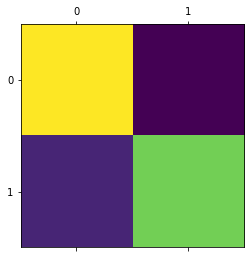

In [67]:
cm = confusion_matrix(Y_test, Y_pred2)
pl.matshow(cm)

<h3> => Logistic Regression </h3> 

In [128]:
len(X_train)

27750

In [129]:
len(Y_train)

27750

In [130]:
Y_Class = []
#True : popular
#False : unpopular
for i in range (0,len(Y)):
    if Y[i]>mean : #and Y[i]<Y_limit:
        Y_Class.append(True)
    else:
        #if Y[i]<mean:
        Y_Class.append(False)


In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_Class, test_size=0.3) 

LReg = LogisticRegression(solver='liblinear', random_state=0)


In [132]:
LReg.fit(X_train, Y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [133]:
#If it is popular (true) or not (false)
Y_pred = LReg.predict(X_test)

#The probability that it is popular (true) or not (false)
Y_prob = LReg.predict_proba(X_test)

print(LReg.score(X_test,Y_test))
# Score : 0.7972086766436859

0.7977131326719354


In [137]:
Y_pred

array([False, False, False, ..., False, False, False])

In [144]:
Y_test

[False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,

In [141]:
print("Accuracy:",metrics.accuracy_score(Y_pred, Y_test)) 
#Accuracy: 0.7977131326719354, similar as random forest classification

Accuracy: 0.7977131326719354
